In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use(['seaborn-v0_8-talk'])

names = ['stn', 'icg', 'rosenbrock', 'neal', 'funnel']

colors = ['black', 'tab:blue']
labels = ['HMC', 'MCHMC']

[[200.   0.]
 [230.   0.]
 [260.   0.]
 [290.   0.]
 [320.   0.]
 [350.   0.]
 [380.   0.]
 [410.   0.]
 [440.   0.]
 [470.   0.]
 [500.   0.]
 [530.   0.]
 [560.   0.]
 [590.   0.]
 [620.   0.]
 [650.   0.]
 [680.   0.]]


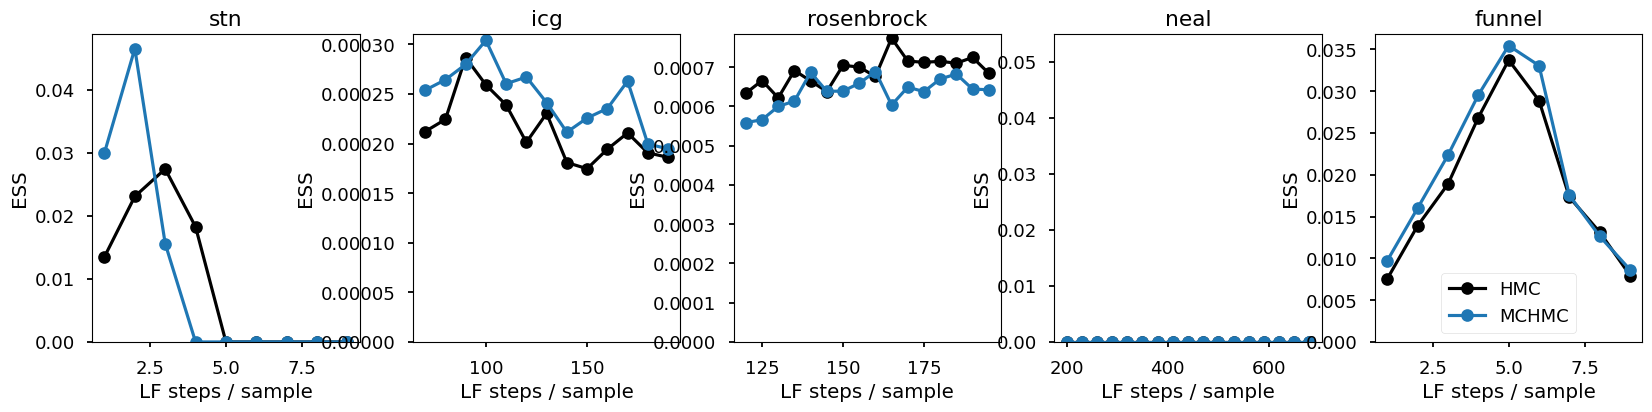

In [21]:
L = np.arange(1, 11)
fmt = ['-o', '-o']
fig = plt.figure(figsize = (20, 4))
ax = fig.subplots(1, 5)
for itarget in range(5):
    ax[itarget].set(title = names[itarget], xlabel = 'LF steps / sample', ylabel = 'ESS')
    #ax[itarget].label_outer()
    for imethod in range(2):
        x = np.load('data/ess/hmc/' + labels[imethod] + '/' + names[itarget] + '.npy')
        ax[itarget].plot(x[:, 0], x[:, 1], fmt[imethod], color = colors[imethod], label = labels[imethod])
        if imethod == 0 and itarget == 3:
            print(x)
    ax[itarget].set_ylim(0, ax[itarget].get_ylim()[1])

ax[-1].legend()
plt.savefig('img/hmc.png')
plt.show()

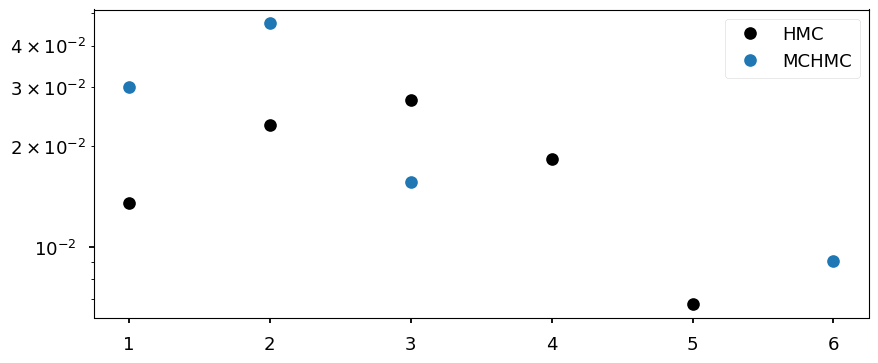

In [3]:
L = [1, 2, 3, 4, 5, 6]
fmt = ['o', 'o']
fig = plt.figure(figsize = (10, 4))
itarget = 0
for imethod in range(2):
    x = np.load('data/ess/hmc/' + labels[imethod] + '/' + names[itarget] + '.npy')
    plt.plot(L, x, fmt[imethod], color = colors[imethod], label = labels[imethod])
    
plt.legend()
plt.yscale('log')
#ax[-1].legend()
#plt.savefig('img/hmc.png')
plt.show()

In [ ]:
A = np.array([0.6, 0.65, 0.7, 0.75, 0.8])


plt.figure(figsize = (20, 4))
for itarget in range(len(names)):
    plt.subplot(1, 6, itarget + 1)
    plt.title(names[itarget])

    for imethod in range(2):
        x = np.sort(np.load('data/ess/' + names[itarget] + '_'+ labels[imethod]+ '.npy'), axis = -1)
        chains= x.shape[-1]
        plt.plot(A, x[:, chains//2], '-', color = colors[imethod], label = labels[imethod])
        plt.fill_between(A, x[:, chains//4], x[:, 3*chains//4], color = colors[imethod], alpha = 0.3)
        
    plt.xlabel('acceptance rate')
    if itarget == 0:
        plt.ylabel('# gradients / ESS')
plt.legend()
plt.savefig('img/nuts.png')
plt.show()
